In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
sys.path.append('/Users/albertsmith/Documents/GitHub/')
import SLEEPY as sl
import matplotlib.pyplot as plt
import numpy as np
sl.Defaults['parallel']=True
from time import time
from copy import copy

In [14]:
ex0=sl.ExpSys(v0H=600,Nucs=['15N','1H'],vr=60000,pwdavg=sl.PowderAvg('bcr20'),n_gamma=30)
# After varying the powder average and n_gamma, a beta-average and 30 gamma angles seems sufficient
delta=sl.Tools.dipole_coupling(.102,'15N','1H')
ex0.set_inter('dipole',i0=0,i1=1,delta=delta)
ex,kex=sl.Tools.Setup3siteSym(ex0,tc=1e-9,phi=35*np.pi/180)

L=sl.Liouvillian(ex,kex=kex)

v1=150e3 #100 kHz pulse
tp=1/v1/2 #pi/2 pulse length

t=[0,L.taur/2-tp,L.taur/2,L.taur-tp,L.taur]
first=L.Sequence().add_channel('1H',t=t,v1=[0,v1,0,v1,0],phase=[0,0,0,np.pi/2,0])
t=[0,tp,L.taur/2,L.taur/2+tp,L.taur]
second=L.Sequence().add_channel('1H',t=t,v1=[v1,0,v1,0],phase=[np.pi/2,0,0,0,0])
center=L.Sequence().add_channel('15N',t=[0,L.taur/2-tp/2,L.taur/2+tp/2,L.taur],
                               v1=[0,v1,0])

rho=sl.Rho('15Nx','15Nx')

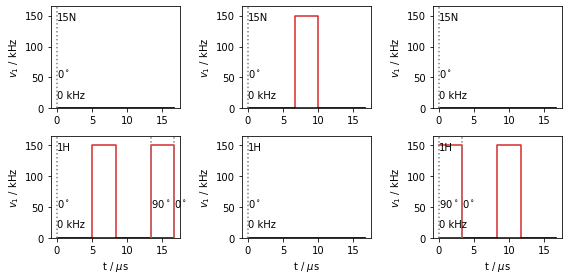

In [15]:
fig,ax=plt.subplots(2,3)
first.plot(ax=ax.T[0])
center.plot(ax=ax.T[1])
second.plot(ax=ax.T[2])
fig.set_size_inches([8,4])
fig.tight_layout()

In [16]:
Ucenter=center.U()
Ufirst=first.U()
Usecond=second.U()

In [21]:
rho=sl.Rho('15Nx','15Nx')
U1=L.Ueye()
U2=L.Ueye()

t0=time()
for k in range(48):
    (U2*Ucenter*U1*rho)()
    U1=Ufirst*U1
    U2=Usecond*U2
print(time()-t0)

3.0384421348571777


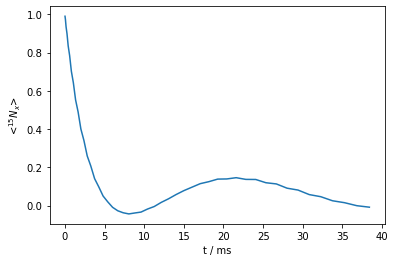

In [22]:
ax=rho.plot()

### Reducible sequence

In [2]:
ex0=sl.ExpSys(v0H=600,Nucs=['15N','1H'],vr=60000,pwdavg=sl.PowderAvg('bcr20'),n_gamma=30)
# After varying the powder average and n_gamma, a beta-average and 30 gamma angles seems sufficient
delta=sl.Tools.dipole_coupling(.102,'15N','1H')
ex0.set_inter('dipole',i0=0,i1=1,delta=delta)
ex,kex=sl.Tools.Setup3siteSym(ex0,tc=1e-9,phi=35*np.pi/180)

L=sl.Liouvillian(ex,kex=kex)

v1=150e3 #100 kHz pulse
tp=1/v1/2 #pi/2 pulse length

t=[0,L.taur/2-tp,L.taur/2,L.taur-tp,L.taur]
first=L.Sequence().add_channel('1H',t=t,v1=[0,v1,0,v1],phase=[0,0,0,np.pi/2])
t=[0,tp,L.taur/2,L.taur/2+tp,L.taur]
second=L.Sequence().add_channel('1H',t=t,v1=[v1,0,v1,0],phase=[0,0,np.pi/2,0])
center=L.Sequence().add_channel('1H',t=t,v1=[0,0,v1,0],phase=[0,0,np.pi/2,0])

rho=sl.Rho('15Np','15Nx')

rho,first,second,center,Ueye=rho.ReducedSetup(first,second,center,L.Ueye())

State-space reduction: 48->12


In [3]:
Ufirst=first.U()
Usecond=second.U()
Ucenter=center.U()

In [4]:
rho.clear()
U1=Ufirst
U2=Ucenter

t0=time()
Uf=Ufirst**2
Us=Usecond**2

for k in range(24):
    U2*U1*rho()
    U1=Uf*U1
    U2=Us*U2
print(time()-t0)

/Users/albertsmith/Documents/GitHub/SLEEPY/Rho.py:636: UserWarning: Reduced Liouvillian applied to uninitialized propagator. Make sure reduction was perfomed with same Rho
  warnings.warn('Reduced Liouvillian applied to uninitialized propagator. Make sure reduction was perfomed with same Rho')


31.582448959350586


<AxesSubplot:xlabel='t / ms', ylabel='<$^{15}N_x$>'>

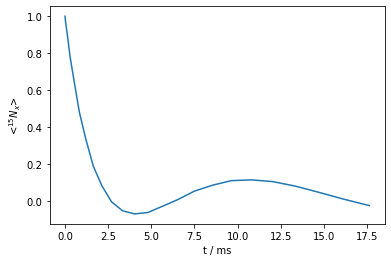

In [5]:
rho.plot()

## Sweep the correlation time

In [24]:
ex0=sl.ExpSys(v0H=600,Nucs=['15N','1H'],vr=60000,pwdavg=sl.PowderAvg('rep66'),n_gamma=30)
# After varying the powder average and n_gamma, a beta-average and 30 gamma angles seems sufficient
delta=sl.Tools.dipole_coupling(.102,'15N','1H')
ex0.set_inter('dipole',i0=0,i1=1,delta=delta)
ex,kex=sl.Tools.Setup3siteSym(ex0,tc=1e-9,phi=35*np.pi/180)

L=sl.Liouvillian(ex,kex=kex)

v1=150e3 #100 kHz pulse
tp=1/v1/2 #pi/2 pulse length
rho_list=[]
legend=[]
t0=time()
for tc in np.logspace(-8,-1,8):
    L.kex=sl.Tools.nSite_sym(n=3,tc=tc)

    t=[0,L.taur/2-tp,L.taur/2,L.taur-tp,L.taur]
    first=L.Sequence().add_channel('1H',t=t,v1=[0,v1,0,v1],phase=[0,0,0,np.pi/2])
    t=[0,tp,L.taur/2,L.taur/2+tp,L.taur]
    second=L.Sequence().add_channel('1H',t=t,v1=[v1,0,v1,0],phase=[0,0,np.pi/2,0])
    center=L.Sequence().add_channel('1H',t=t,v1=[0,0,v1,0],phase=[0,0,np.pi/2,0])

    rho_list.append(sl.Rho('15Np','15Nx'))

    rho_list[-1],first,second,center,Ueye=rho_list[-1].ReducedSetup(first,second,center,L.Ueye())

    Ufirst=first.U()
    Usecond=second.U()
    Ucenter=center.U()

    U1=Ufirst
    U2=Ucenter

    Uf=Ufirst*Ufirst
    Us=Usecond*Usecond

    for k in range(24):
        U2*U1*rho_list[-1]()
        U1=Uf*U1
        U2=Us*U2

    legend.append(fr'$\log_{{10}}(\tau_c)$ = {np.log10(tc):.0f}')
    print(f'log10(tc /s) = {np.log10(tc):.0f}, {time()-t0:.0f} seconds elapsed')

State-space reduction: 48->12
log10(tc /s) = -8, 106 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -7, 218 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -6, 325 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -5, 430 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -4, 536 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -3, 640 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -2, 741 seconds elapsed
State-space reduction: 48->12
log10(tc /s) = -1, 844 seconds elapsed


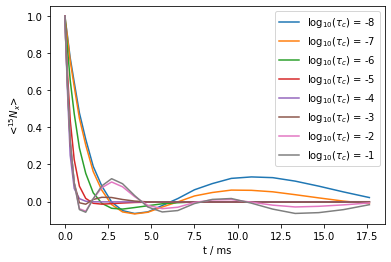

In [28]:
ax=plt.subplots()[1]
for rho0 in rho_list:rho0.plot(ax=ax)
ax.legend(legend)

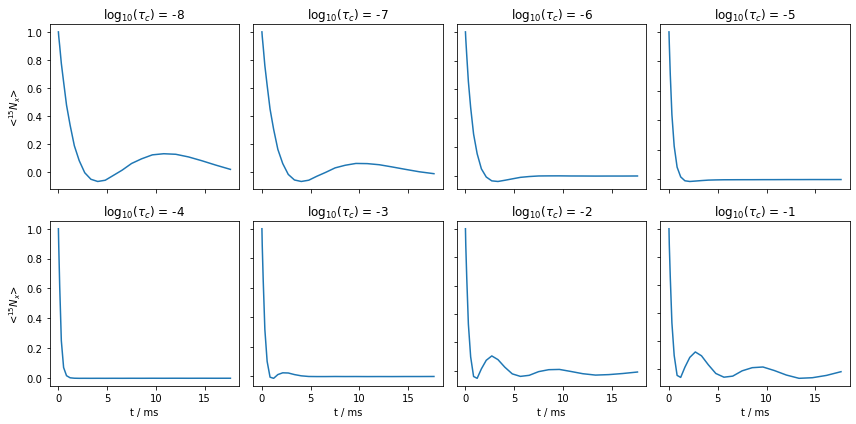

In [30]:
fig,ax=plt.subplots(2,4)
ax=ax.flatten()
for a,l,r in zip(ax,legend,rho_list):
    r.plot(ax=a)
    a.set_title(l)
    if not(a.is_first_col()):
        a.set_ylabel('')
        a.set_yticklabels([])
    if not(a.is_last_row()):
        a.set_xlabel('')
        a.set_xticklabels([])
fig.set_size_inches([12,6])
fig.tight_layout()

In [40]:
ex0=sl.ExpSys(v0H=600,Nucs=['15N','1H'],vr=60000,pwdavg=sl.PowderAvg('rep66'),n_gamma=30)
# After varying the powder average and n_gamma, a beta-average and 30 gamma angles seems sufficient
delta=sl.Tools.dipole_coupling(.102,'15N','1H')
S=-1/2+3/2*np.cos(35*np.pi/180)**2
ex0.set_inter('dipole',i0=0,i1=1,delta=delta*S)

L=sl.Liouvillian(ex0)


v1=150e3 #100 kHz pulse
tp=1/v1/2 #pi/2 pulse length

t=[0,L.taur/2-tp,L.taur/2,L.taur-tp,L.taur]
first=L.Sequence().add_channel('1H',t=t,v1=[0,v1,0,v1],phase=[0,0,0,np.pi/2])
t=[0,tp,L.taur/2,L.taur/2+tp,L.taur]
second=L.Sequence().add_channel('1H',t=t,v1=[v1,0,v1,0],phase=[0,0,np.pi/2,0])
center=L.Sequence().add_channel('1H',t=t,v1=[0,0,v1,0],phase=[0,0,np.pi/2,0])

rho=sl.Rho('15Np','15Nx')

rho,first,second,center,Ueye=rho.ReducedSetup(first,second,center,L.Ueye())

Ucenter=center.U()
Ufirst=first.U()
Usecond=second.U()

U1=Ufirst
U2=Ucenter

Uf=Ufirst*Ufirst
Us=Usecond*Usecond

for k in range(24):
    U2*U1*rho()
    U1=Uf*U1
    U2=Us*U2

State-space reduction: 16->4


<AxesSubplot:xlabel='t / ms', ylabel='<$^{15}N_x$>'>

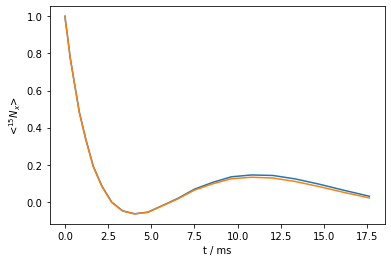

In [39]:
ax=rho.plot()
rho_list[0].plot(ax=ax)